## TAKE HOME TEST - DATA PREPARATION

> ### Objective: 
> - To demonstrate practical skills in data preprocessing by cleansing and preparing the data.
> 
> ### Dataset: 
> - The Adult dataset, available at [UCI Machine Learning Repository - Adult Dataset](https://archive.ics.uci.edu/dataset/2/adult). 
> - The dataset aims to predict whether an individual's income exceeds $50K/yr based on census data.

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = "data/adult_csv.csv"

df = pd.read_csv(data)

In [3]:
print("Rows x Columns:", df.shape)

Rows x Columns: (48842, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [7]:
columns_to_float = ['fnlwgt', 'hoursperweek']
df[columns_to_float] = df[columns_to_float].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capitalgain     48842 non-null  int64  
 11  capitalloss     48842 non-null  int64  
 12  hoursperweek    48842 non-null  float64
 13  native-country  47985 non-null  object 
 14  class           48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2.0,United-States,<=50K
1,3,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0.0,United-States,<=50K
2,2,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2.0,United-States,<=50K
3,3,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2.0,United-States,<=50K
4,1,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2.0,Cuba,<=50K


### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [9]:
print("Number of missing values:\n")
print(df.isna().sum())

Number of missing values:

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64


In [10]:
print("Percentage of missing values:\n")
(df.isnull().mean() * 100).round(2).astype(str) + '%'

Percentage of missing values:



age                0.0%
workclass         5.73%
fnlwgt             0.0%
education          0.0%
education-num      0.0%
marital-status     0.0%
occupation        5.75%
relationship       0.0%
race               0.0%
sex                0.0%
capitalgain        0.0%
capitalloss        0.0%
hoursperweek       0.0%
native-country    1.75%
class              0.0%
dtype: object

In [11]:
df[['workclass', 'occupation', 'native-country']] = df[['workclass', 'occupation', 'native-country']].fillna(0)

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64


### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [12]:
df_num = df.select_dtypes(include = ['int64','float64'])

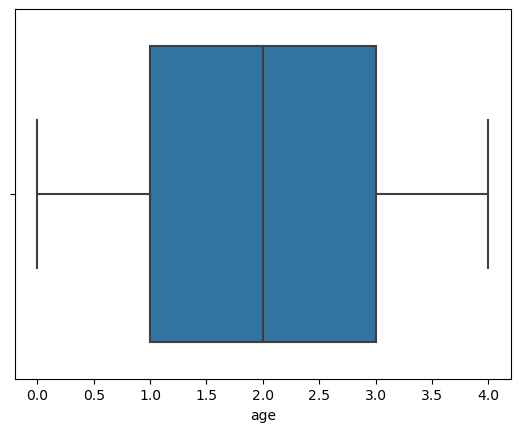

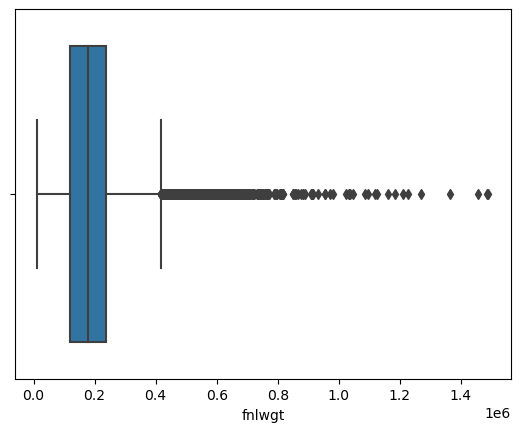

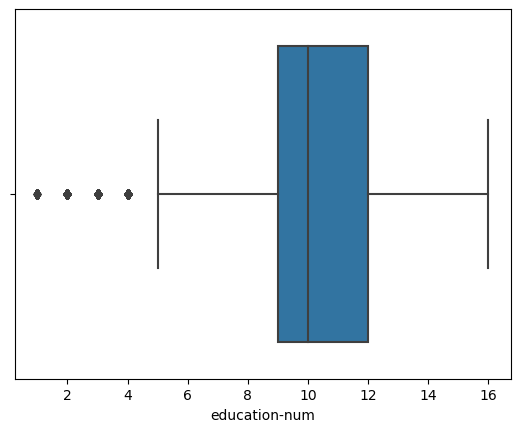

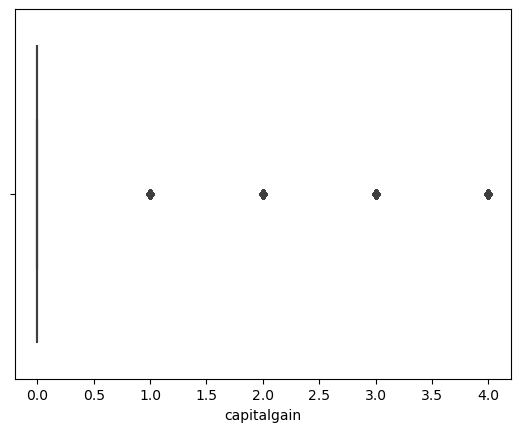

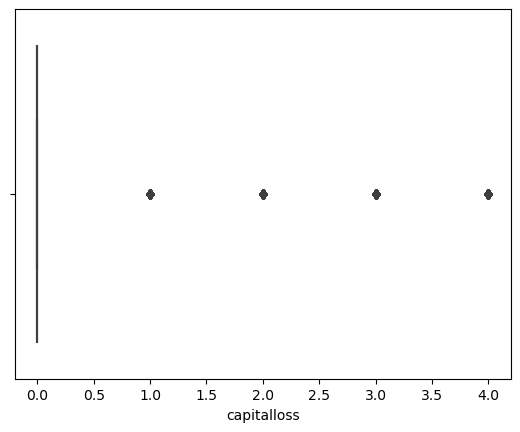

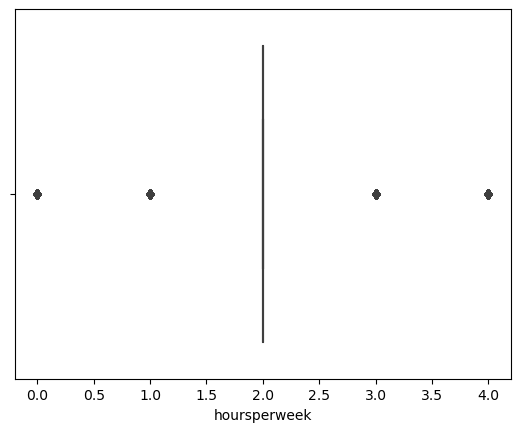

In [13]:
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [14]:
# function to find outliers,using numpy
def find_outliers(yourlist):
    Q1 = np.quantile(yourlist, .25)
    Q2 = np.quantile(yourlist, .50)
    Q3 = np.quantile(yourlist, .75)
    
    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    outlier_rows = []
    
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier = outlier + str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier = outlier + str(yourlist[i]) + ', '
    return outlier

In [15]:
age = df['age'].sort_values().values.tolist()
print('Jumlah outlier feature age yaitu:', len(find_outliers(age)))

Jumlah outlier feature age yaitu: 0


In [16]:
fnlwgt = df['fnlwgt'].sort_values().values.tolist()
print('Jumlah outlier feature fnlwgt yaitu:', len(find_outliers(fnlwgt)))

Jumlah outlier feature fnlwgt yaitu: 14548


In [17]:
capitalgain = df['capitalgain'].sort_values().values.tolist()
print('Jumlah outlier feature capitalgain yaitu:', len(find_outliers(capitalgain)))

Jumlah outlier feature capitalgain yaitu: 12105


In [18]:
capitalloss = df['capitalloss'].sort_values().values.tolist()
print('Jumlah outlier feature capitalloss yaitu:', len(find_outliers(capitalloss)))

Jumlah outlier feature capitalloss yaitu: 6846


In [19]:
education_num = df['education-num'].sort_values().values.tolist()
print('Jumlah outlier feature education-num yaitu:', len(find_outliers(education_num)))

Jumlah outlier feature education-num yaitu: 5382


In [20]:
hoursperweek = df['hoursperweek'].sort_values().values.tolist()
print('Jumlah outlier feature hoursperweek yaitu:', len(find_outliers(hoursperweek)))

Jumlah outlier feature hoursperweek yaitu: 105165
